In [1]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [93]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.font_manager as fm

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats


# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso, LinearRegression, LogisticRegression

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, ShuffleSplit, StratifiedKFold, cross_validate, learning_curve, GridSearchCV, KFold

import re
import sklearn
import xgboost as xgb

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import catboost
from catboost import Pool
from catboost import CatBoostRegressor

In [60]:
sale = pd.read_csv("datas/SW-df.csv")
sale.tail()

,total_revenue,day,month,time,con_time,category,price,precipitation,temp_diff,mean_temp,sell_sequence,rank_seq_mean,rank_brand
37359,55718000.0,7,11,17,0.708333,4,58900.0,0.0,11.4,1.3,3,6,464
37360,52542000.0,5,12,15,0.625000,4,58900.0,0.0,9.6,-3.2,1,1,464
37361,45331000.0,6,12,15,0.625000,4,58900.0,1.2,9.8,23.2,1,1,464
37362,51303000.0,1,12,17,0.736111,4,58900.0,0.0,17.0,19.2,1,1,464
37363,56239000.0,7,12,17,0.722222,4,58900.0,1.9,10.2,22.8,1,1,464


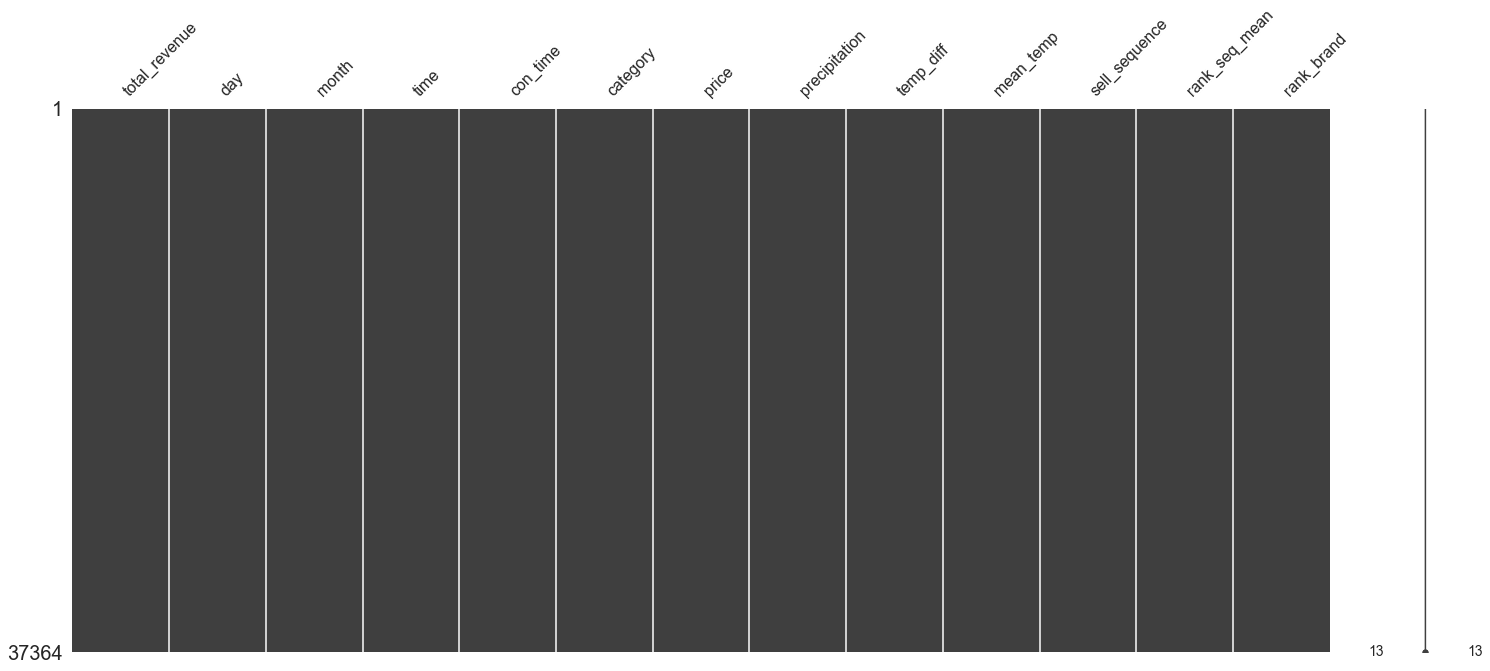

In [43]:
# 시청률 데이터에 포함 되지 않는 관측값 제외
import missingno as msno

msno.matrix(sale)
plt.show()

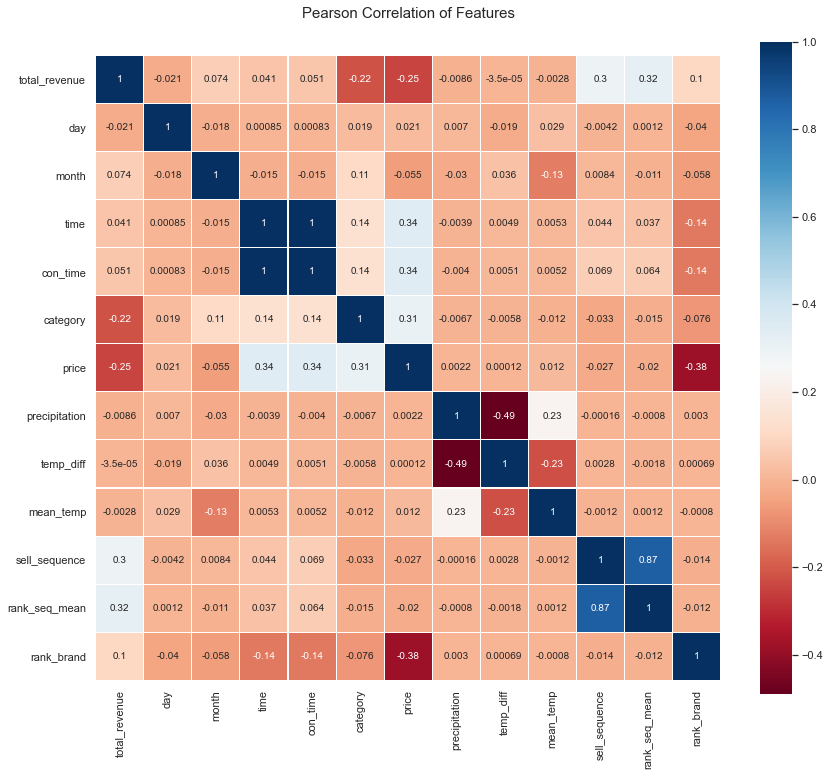

In [44]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(sale.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

- y = sale.total_revenue
- X = sale.loc[:, sale.columns != 'total_revenue']

In [45]:
sale.describe().T

,count,mean,std,min,25%,50%,75%,max
total_revenue,37364.0,2.187039e+07,2.018786e+07,50000.0,6.880000e+06,1.612850e+07,3.162800e+07,3.220090e+08
day,37364.0,3.977090e+00,2.005575e+00,1.0,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
month,37364.0,6.463789e+00,3.374532e+00,1.0,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
time,37364.0,1.431027e+01,6.619420e+00,0.0,1.000000e+01,1.500000e+01,2.100000e+01,2.300000e+01
con_time,37364.0,6.102002e-01,2.761447e-01,0.0,4.166667e-01,6.250000e-01,8.750000e-01,9.930556e-01
category,37364.0,5.027941e+00,2.888292e+00,1.0,3.000000e+00,4.000000e+00,7.000000e+00,1.100000e+01
price,37364.0,4.680703e+05,7.315106e+05,12800.0,5.900000e+04,1.099000e+05,5.090000e+05,7.930000e+06
precipitation,37364.0,3.421202e+00,9.498060e+00,0.0,0.000000e+00,1.000000e-01,1.700000e+00,1.063000e+02
temp_diff,37364.0,1.049286e+01,3.235265e+00,3.0,8.300000e+00,1.030000e+01,1.280000e+01,1.900000e+01
mean_temp,37364.0,1.386228e+01,9.010993e+00,-3.8,5.800000e+00,1.470000e+01,2.200000e+01,2.880000e+01


In [46]:
# Grouping data for EDA.
gp_month_mean = sale.groupby(['month'], as_index=False)['total_revenue'].mean()
gp_month_sum = sale.groupby(['month'], as_index=False)['total_revenue'].sum()
gp_category_mean = sale.groupby(['category'], as_index=False)['total_revenue'].mean()
gp_category_sum = sale.groupby(['category'], as_index=False)['total_revenue'].sum()
gp_day_mean = sale.groupby(['day'], as_index=False)['total_revenue'].mean()
gp_day_sum = sale.groupby(['day'], as_index=False)['total_revenue'].sum()
gp_time_mean = sale.groupby(['time'], as_index=False)['total_revenue'].mean()
gp_time_sum = sale.groupby(['time'], as_index=False)['total_revenue'].sum()

### 어떤달에 잘 팔렸을까

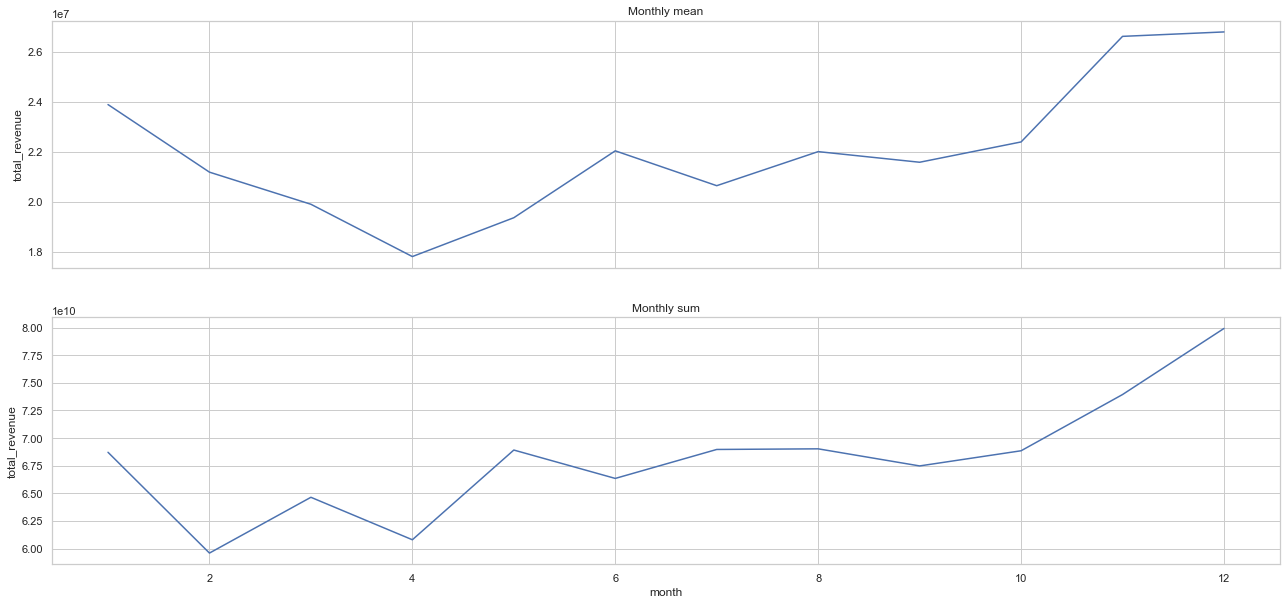

In [47]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.lineplot(x="month", y="total_revenue", data=gp_month_mean, ax=axes[0]).set_title("Monthly mean")
sns.lineplot(x="month", y="total_revenue", data=gp_month_sum, ax=axes[1]).set_title("Monthly sum")
plt.show()

### 어떤 상품군이 잘 팔렸을까

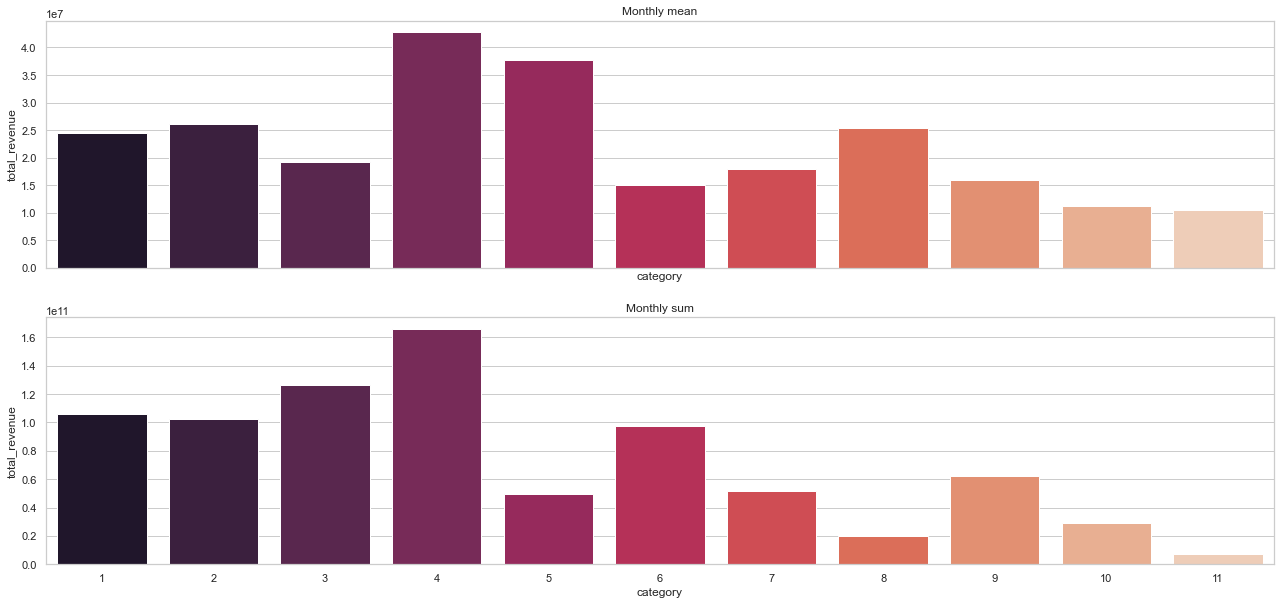

In [48]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="category", y="total_revenue", data=gp_category_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="category", y="total_revenue", data=gp_category_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

### 어떤요일에 더 잘 팔렸을까

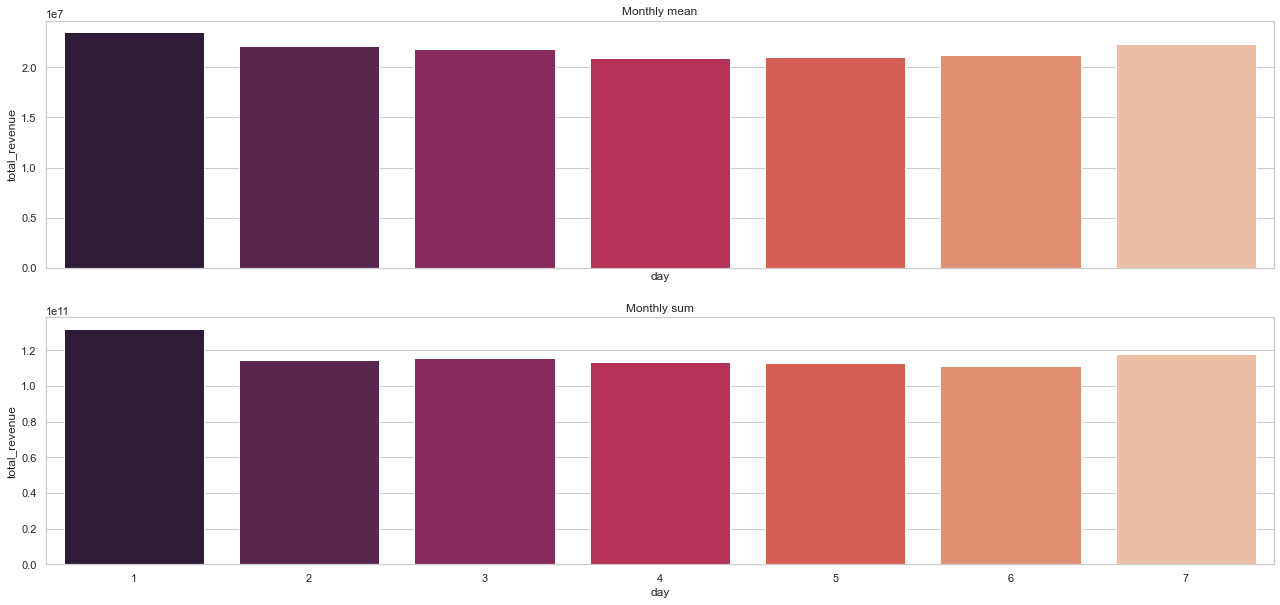

In [49]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="day", y="total_revenue", data=gp_day_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="day", y="total_revenue", data=gp_day_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

### 몇 시에 잘 팔렸을까

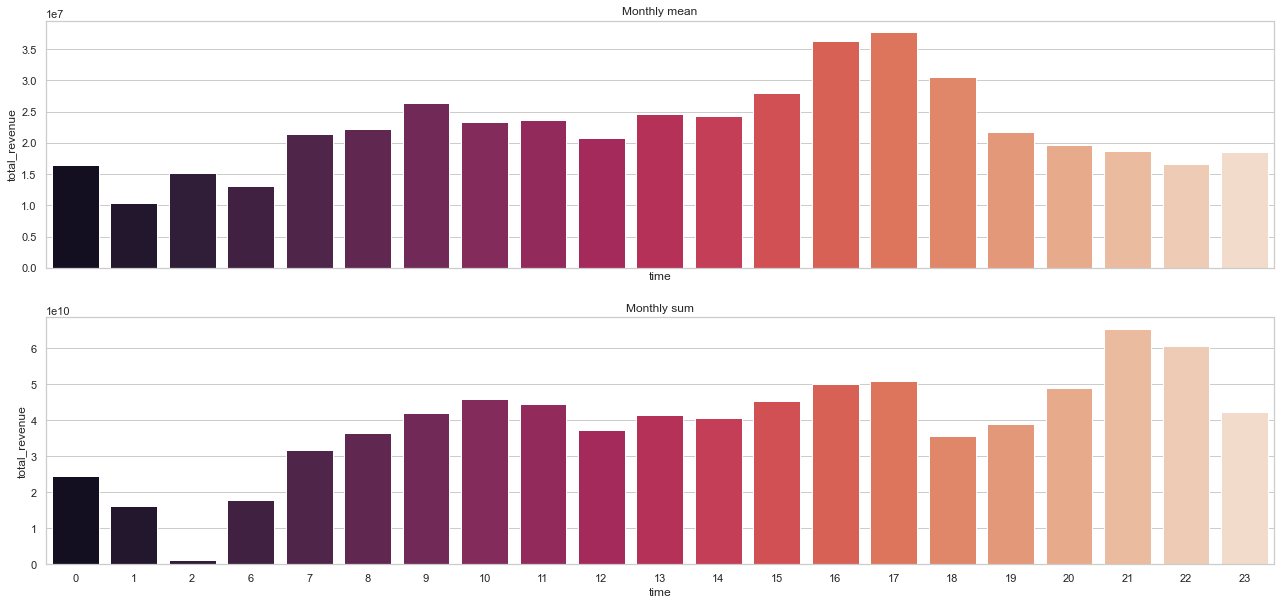

In [50]:
f, axes = plt.subplots(2, 1, figsize=(22, 10), sharex=True)
sns.barplot(x="time", y="total_revenue", data=gp_time_mean, ax=axes[0], palette="rocket").set_title("Monthly mean")
sns.barplot(x="time", y="total_revenue", data=gp_time_sum, ax=axes[1], palette="rocket").set_title("Monthly sum")
plt.show()

### 아웃라이어 검사

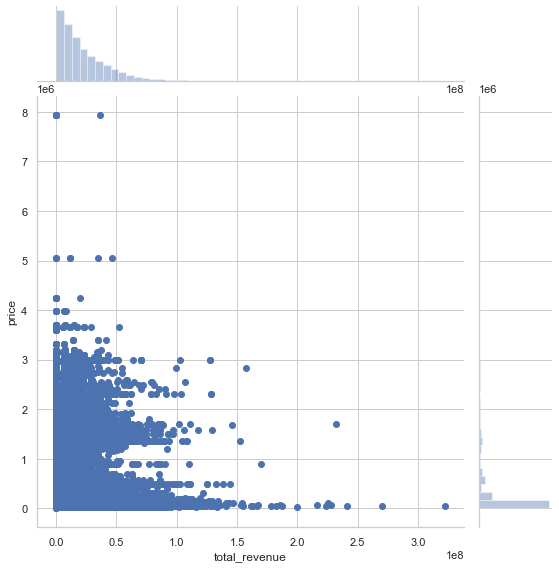

In [51]:
sns.jointplot(x="total_revenue", y="price", data=sale, height=8)
plt.show()

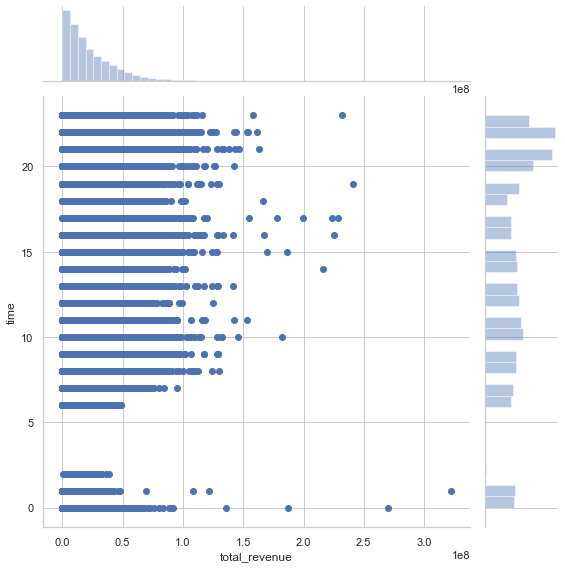

In [52]:
sns.jointplot(x="total_revenue", y="time", data=sale, height=8)
plt.show()

### 취급액의 분포

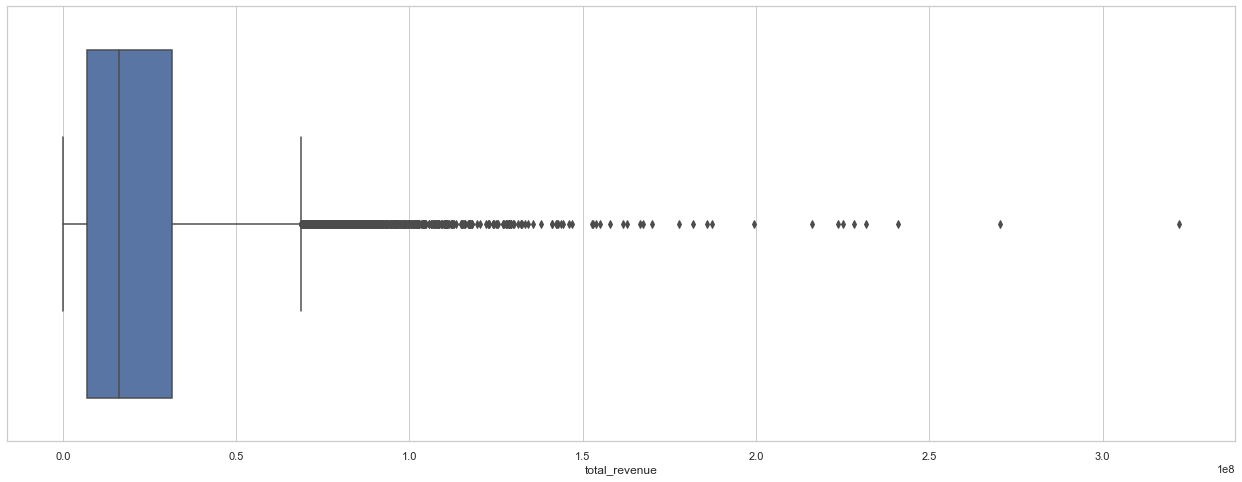

In [61]:
plt.subplots(figsize=(22, 8))
sns.boxplot(sale['total_revenue'])
plt.show()

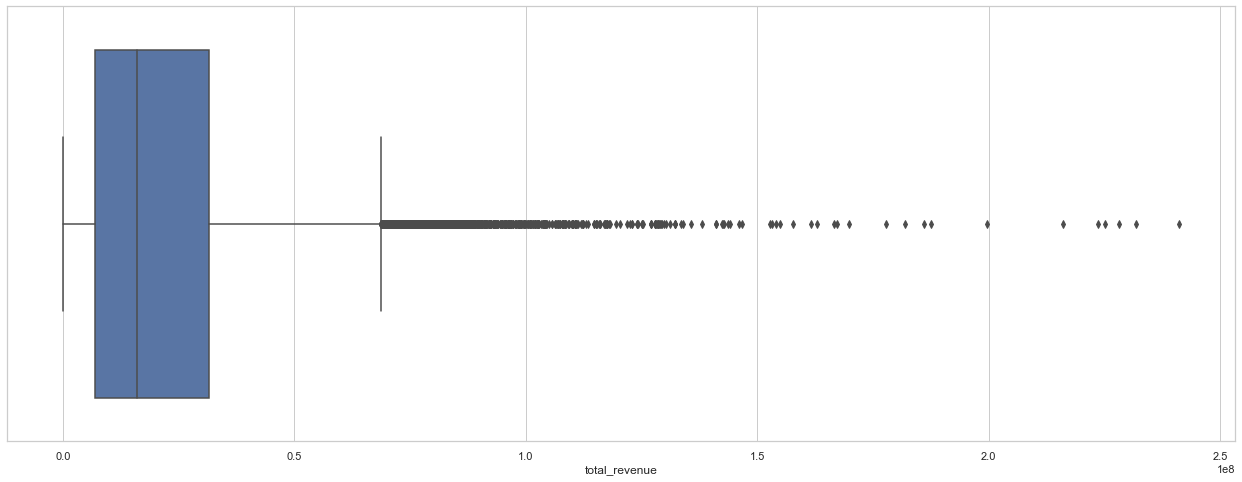

In [62]:
sale = sale.query('total_revenue <= 2.5*1e8')

plt.subplots(figsize=(22, 8))
sns.boxplot(sale['total_revenue'])
plt.show()

In [78]:
train, test = train_test_split(sale, test_size=0.2, random_state=0)

In [79]:
# Some useful parameters which will come in handy later on
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_splits= NFOLDS, random_state=SEED)

In [80]:
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

# Class to extend XGboost classifer

In [81]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [82]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [83]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [84]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train['total_revenue'].astype(int)
x_train = train.drop(['total_revenue'], axis=1) # Creates an array of the train data
x_test = test.drop(['total_revenue'], axis=1) # Creats an array of the test data

In [90]:
x_test.head().T

,6218,26287,34296,4182,2004
day,5.000,4.000000e+00,7.000000,1.000000,3.000000
month,8.000,7.000000e+00,8.000000,12.000000,6.000000
time,21.000,2.300000e+01,7.000000,23.000000,22.000000
con_time,0.875,9.583333e-01,0.319444,0.958333,0.947917
category,6.000,6.000000e+00,7.000000,2.000000,6.000000
price,1920000.000,2.349000e+06,74000.000000,119000.000000,749000.000000
precipitation,0.000,0.000000e+00,6.900000,0.000000,3.800000
temp_diff,16.800,1.260000e+01,7.800000,12.000000,10.300000
mean_temp,10.700,3.900000e+00,17.300000,-0.200000,20.400000
sell_sequence,1.000,1.000000e+00,3.000000,2.000000,4.000000


In [ ]:
# Create our OOF train and test predictions. These base results will be used as new features
#et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
#rf_oof_train, rf_oof_test = get_oof(rf ,x_train, y_train, x_test) # Random Forest
#ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
#gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
#svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

In [ ]:
#rf_feature = rf.feature_importances(x_train,y_train)
#et_feature = et.feature_importances(x_train, y_train)
#ada_feature = ada.feature_importances(x_train, y_train)
#gb_feature = gb.feature_importances(x_train,y_train)

In [94]:
cat_features = [0, 1, 7, 8]

catboost_model = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=4
)

catboost_model.fit(
    x_train, y_train,
    cat_features=cat_features
)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=7]=14.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.